In [67]:
# Pandas is a library for basic data analysis
import pandas as pd

# NumPy is a library for advanced mathematical computation
import numpy as np

# MatPlotLib is a library for basic data visualization
import matplotlib.pyplot as plt

# SeaBorn is a library for advanced data visualization
import seaborn as sns

In [68]:
#read the csv data
FILE_PATH = '../SA Feedback Surveys_FINAL/2017/Student Feedback Surveys-Superview.csv'
df = pd.read_csv(FILE_PATH)
df.head()


,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,36,Los Angeles,Apps,Week 1,4,A little too fast
2,117,San Francisco,Games,Week 1,4,Way too slow
3,253,NaN,NaN,Week 2,4,A little too fast
4,350,New York City,"Apps, Explorer",Week 1,4,Just right


## Questions to answer
* How many more promoters are there than detractors across our 2017 data?
* Which track boasts the best promoter-to-detractor ratio?
* Does the student experience get better the longer that they are enrolled at the Summer Academy?
* Does student satisfaction vary by location?
* What are things we could find here that could “help the business”?
* What sorts of information does this dataset contain?
* What kinds of questions might we be able to answer with this data?
* What kinds of questions can’t we answer with this data?
* What sorts of information might be actionable?
* How can you present your findings in a way that non-technical employees can understand and use to make decisions?


## 1, How many more promoters are there than detractors across our 2017 data?

In [69]:
#change the col rating to int
# print (df[pd.to_numeric(df['Rating (Num)'] , errors='coerce').isnull()])
df.drop(df.loc[df['Rating (Num)']== '#ERROR!'].index, inplace=True)
df['Rating (Num)'] = pd.to_numeric(df['Rating (Num)'])

#put values in different bins based on where their range falls
bins = [0, 7, 9, np.inf]
names = ['detractor', 'passive', 'promoter']

df['rate'] = pd.cut(df['Rating (Num)'], bins, labels = names)



In [70]:
#count of each values
df['rate'].value_counts()
promoter = df['rate'].value_counts()['promoter']
detractor = df['rate'].value_counts()['detractor']
difference = promoter - detractor
difference
#make a new column(array)
#to compute nps score


80

## There are 80 more promoters than detractors

array([776, 376, 296])

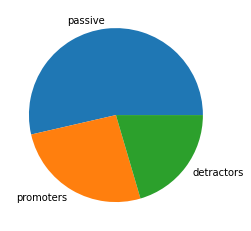

In [111]:
#pie chart
labels = 'passive', 'promoters', 'detractors'
plt.pie(df['rate'].value_counts().values, labels = labels)
df['rate'].value_counts().values


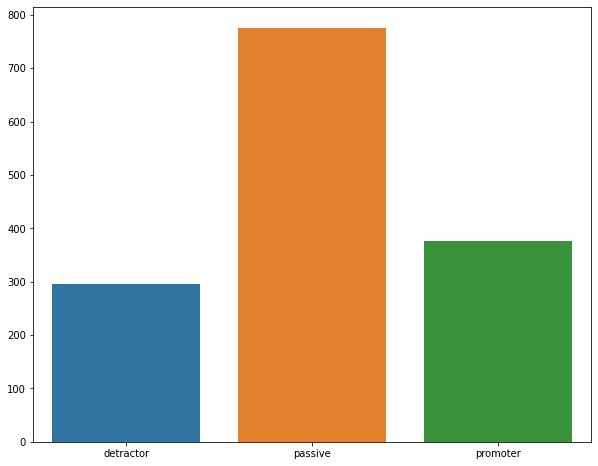

In [71]:
#creates a plot box of size 1000px width and 800 px height
plt.subplots(figsize=(10,8))
#bar plot (histogram) of the frequency of sizeMB
sns.barplot(y=df['rate'].value_counts().values, x=df['rate'].value_counts().index)

## Calculate the NPS

In [72]:
#A positive NPS (>0) is generally considered as good.

promoters = df['rate'].value_counts()['promoter']
detractors = df['rate'].value_counts()['detractor']
promoters
NPS = (promoters - detractors) / (promoters + passives + detractors) * 100
NPS

5.524861878453039

## 2, Which track boasts the best promoter-to-detractor ratio?

In [73]:
df

,ID,Location,Track,Week,Rating (Num),Schedule Pacing,rate
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right,detractor
1,36,Los Angeles,Apps,Week 1,4,A little too fast,detractor
2,117,San Francisco,Games,Week 1,4,Way too slow,detractor
3,253,NaN,NaN,Week 2,4,A little too fast,detractor
4,350,New York City,"Apps, Explorer",Week 1,4,Just right,detractor
...,...,...,...,...,...,...,...
1448,1495,New York City,"Apps, Explorer",Week 7,10,Just right,promoter
1449,1496,New York City,"Apps, Explorer",Week 7,8,Just right,passive
1450,1497,New York City,Apps,Week 7,10,Just right,promoter
1451,1498,New York City,"Apps, Explorer",Week 7,1,A little too slow,detractor


In [74]:
ratio = df.drop(['Location', 'Week', 'Rating (Num)', 'Schedule Pacing', 'ID'], axis=1)
ratio

,Track,rate
0,"Apps, Explorer",detractor
1,Apps,detractor
2,Games,detractor
3,NaN,detractor
4,"Apps, Explorer",detractor
...,...,...
1448,"Apps, Explorer",promoter
1449,"Apps, Explorer",passive
1450,Apps,promoter
1451,"Apps, Explorer",detractor


In [75]:
#remove na values
ratio = ratio.dropna()
ratio

,Track,rate
0,"Apps, Explorer",detractor
1,Apps,detractor
2,Games,detractor
4,"Apps, Explorer",detractor
5,Apps,detractor
...,...,...
1448,"Apps, Explorer",promoter
1449,"Apps, Explorer",passive
1450,Apps,promoter
1451,"Apps, Explorer",detractor


In [76]:
#crosstab rate and track
pd.crosstab(ratio['Track'], ratio['rate'], normalize=True)
# 
# ratio[ratio['Track'] == 'VR']['rate'].value_counts()

rate,detractor,passive,promoter
Track,,,
Apps,0.133808,0.340214,0.145196
"Apps, Explorer",0.042705,0.080427,0.036299
Games,0.014947,0.092527,0.040569
"Games, Explorer",0.003559,0.014947,0.012100
VR,0.003559,0.014947,0.024199


In [77]:
cross = pd.crosstab(ratio['Track'], ratio['rate'], normalize=True)
promoter_detractor_ratio = cross['promoter'] / cross['detractor']
promoter_detractor_ratio

Track
Apps               1.085106
Apps, Explorer     0.850000
Games              2.714286
Games, Explorer    3.400000
VR                 6.800000
dtype: float64

## Answer 2: From the above answer, we can conclude VR has the highest promoter to detractor ratio



## Question 3: Does the student experience get better the longer that they are enrolled at the Summer Academy?

In [78]:
#schedule pacing and rating for each week 
experience = df.drop(['Location', 'Track', 'Rating (Num)'], axis=1)
experience

,ID,Week,Schedule Pacing,rate
0,134,Week 1,Just right,detractor
1,36,Week 1,A little too fast,detractor
2,117,Week 1,Way too slow,detractor
3,253,Week 2,A little too fast,detractor
4,350,Week 1,Just right,detractor
...,...,...,...,...
1448,1495,Week 7,Just right,promoter
1449,1496,Week 7,Just right,passive
1450,1497,Week 7,Just right,promoter
1451,1498,Week 7,A little too slow,detractor


5.524861878453039

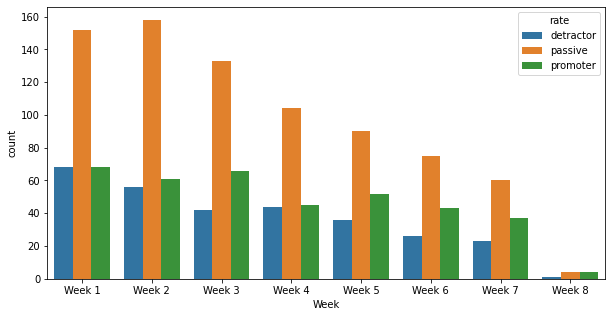

In [118]:
#barplot
plt.subplots(figsize=(10,5))
sns.countplot(hue=experience.rate, x=experience.Week.sort_values())
# print(experience.Week)

#compute the nps score for every single week - and plot

promoters = df['rate'].value_counts()['promoter']
detractors = df['rate'].value_counts()['detractor']
promoters
NPS = (promoters - detractors) / (promoters + passives + detractors) * 100
NPS

## Function to calculate NPS for a given category (column)

In [89]:

def NPS_calc(col):
    #get all unique values of given column (makesure to drop na values here)
    unique_values = df[col].dropna().unique()
    nps_dict = dict()
    
    for val in unique_values:
        #get the value count for each rate and convert to dict
        val_count = dict(df[df[col] == val]['rate'].dropna().value_counts())
        # calculate nps for each val using the value count
        nps = (val_count['promoter'] - val_count['detractor']) / (val_count['promoter'] + val_count['passive'] + val_count['detractor']) * 100
        #put value in the nps_dict
        nps_dict[val] = nps
    #convert nps_dict into a dataframe
    nps_df = pd.DataFrame(nps_dict.items(), columns=[col, 'NPS'])
    return nps_df

NPS_calc('Week').sort_values('Week')


# NPS_calc('Location')

,Week,NPS
0,Week 1,0.000000
1,Week 2,1.818182
3,Week 3,9.958506
4,Week 4,0.518135
5,Week 5,8.988764
6,Week 6,11.805556
2,Week 7,11.666667
7,Week 8,33.333333


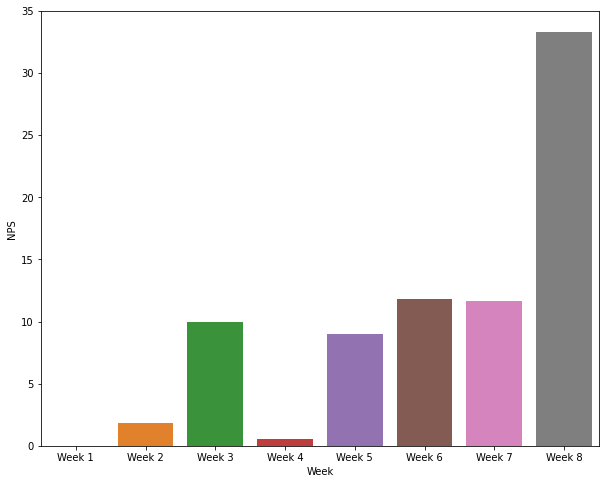

In [85]:
#plot the nps
week_nps = NPS_calc('Week')
plt.subplots(figsize=(10,8))
sns.barplot(y=week_nps.NPS, x=week_nps.Week.sort_values())

## Answer 3: Week 8 has a high NPS value, but there isn't enough data for week 8. < 10
## The next highest week is week 6 then week 7. It looks like the experience is getting better as the weeks go by. Except for week 4. 

In [87]:
 pd.crosstab(experience['Week'], experience['rate'], normalize=True)

rate,detractor,passive,promoter
Week,,,
Week 1,0.046961,0.104972,0.046961
Week 2,0.038674,0.109116,0.042127
Week 3,0.029006,0.091851,0.045580
Week 4,0.030387,0.071823,0.031077
Week 5,0.024862,0.062155,0.035912
Week 6,0.017956,0.051796,0.029696
Week 7,0.015884,0.041436,0.025552
Week 8,0.000691,0.002762,0.002762


In [119]:
 pd.crosstab(experience['Week'], experience['Schedule Pacing'])   #???? cross tab for schedule pacing

Schedule Pacing,A little too fast,A little too slow,Just right,Way too fast,Way too slow
Week,,,,,
Week 1,64,39,179,5,1
Week 2,80,27,161,7,1
Week 3,49,14,175,2,1
Week 4,30,8,151,3,1
Week 5,29,6,143,1,0
Week 6,21,2,119,2,0
Week 7,15,2,101,2,0
Week 8,1,2,5,1,0


## Question 4: Does student satisfaction vary by location?

## Method 1

In [53]:
#find average rating for each city

# remove unwanted columns
loc_df = df.drop(['ID','Track', 'Week', 'Schedule Pacing', 'rate'], axis=1)
#group by location 
loc_df.groupby(['Location']).mean()

###nps score by location

,Rating (Num)
Location,
Atlanta,9.121212
Beijing,8.948718
Chicago,8.485714
Hong Kong,7.181818
Los Angeles,8.773585
New York City,8.275758
Oakland,8.531915
Redwood City,8.327586
San Francisco,8.458333


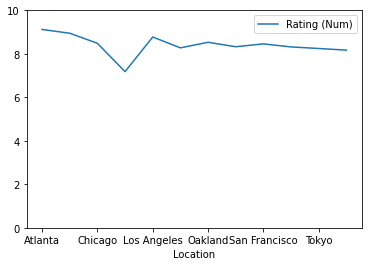

In [54]:
loc_df.groupby(['Location']).mean().plot(ylim=(0,10))

## Method 2 - using NPS

In [90]:
NPS_calc('Location')

,Location,NPS
0,San Francisco,8.333333
1,Los Angeles,20.754717
2,New York City,3.647416
3,Redwood City,-5.172414
4,Santa Clara,-3.482587
5,Oakland,2.127660
6,Washington DC,-6.382979
7,Chicago,1.428571
8,Atlanta,39.393939
9,Hong Kong,-54.545455


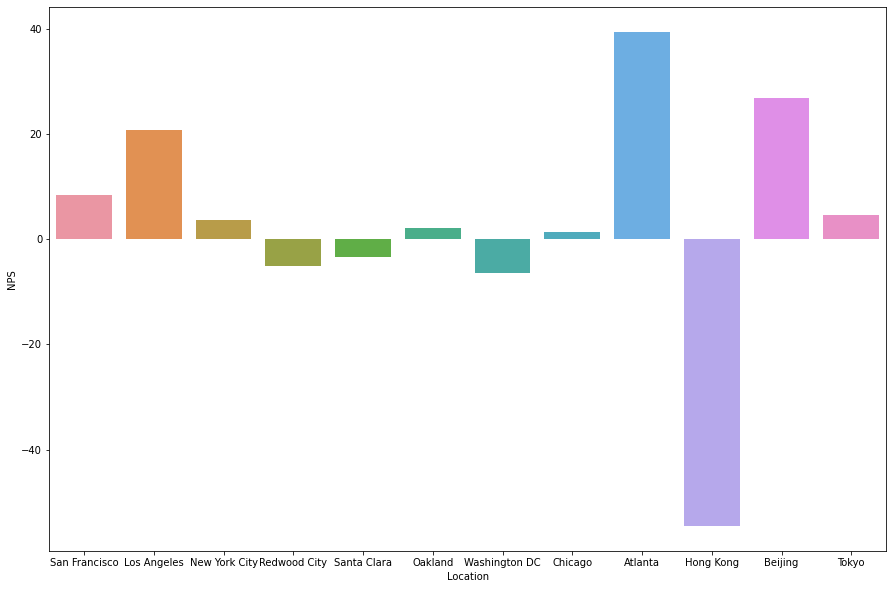

In [96]:
#plot the nps
loc_nps = NPS_calc('Location')
plt.subplots(figsize=(15,10))
sns.barplot(y=loc_nps.NPS, x=loc_nps.Location)

## Answer 4: Student satisfaction doesn't vary on location

## Question 5: Which track is the most popular? (by rating)

In [121]:
#calculate nps for rating for each track
#normalize if the count is not equalized
NPS_calc('Track')

,Track,NPS
0,"Apps, Explorer",-4.017857
1,Apps,1.839080
2,Games,17.307692
3,VR,48.333333
4,"Games, Explorer",27.906977


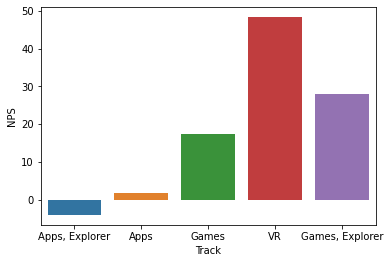

In [122]:
track_nps = NPS_calc('Track')
sns.barplot(y=track_nps.NPS, x=track_nps.Track)


## VR is most popular and Apps, Explorer is least popular

In [123]:
df

,ID,Location,Track,Week,Rating (Num),Schedule Pacing,rate
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right,detractor
1,36,Los Angeles,Apps,Week 1,4,A little too fast,detractor
2,117,San Francisco,Games,Week 1,4,Way too slow,detractor
3,253,NaN,NaN,Week 2,4,A little too fast,detractor
4,350,New York City,"Apps, Explorer",Week 1,4,Just right,detractor
...,...,...,...,...,...,...,...
1448,1495,New York City,"Apps, Explorer",Week 7,10,Just right,promoter
1449,1496,New York City,"Apps, Explorer",Week 7,8,Just right,passive
1450,1497,New York City,Apps,Week 7,10,Just right,promoter
1451,1498,New York City,"Apps, Explorer",Week 7,1,A little too slow,detractor


## Question 6: What are things we could find here that could “help the business”?

#